# Exercise 4.9 Intro to Data Visualization with Python (Part 2)

## This script contains the following:
1. Import Libraries and Data Files
2. Create Visualizations
3. Export Visualizations

# 1. Export Libraries and Data Files

#### Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create a string of the path for the main project folder
path = r'C:\Users\Ryan\Documents\07-17-2023 Instacart Basket Analysis'

In [3]:
# Import the “orders_products_merged.pkl” data set using the os library
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [4]:
# Check the output
ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spender_label,median_days_since_prior_order,customer_frequency_level,first_name,last_name,state,age,number_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Alabama,31,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Alabama,31,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Alabama,31,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Alabama,31,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Alabama,31,3,married,40423


In [5]:
# Check the dimensions
ords_prods_all.shape

(32404859, 29)

# 2. Create Visualizations of the Data

#### If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

#### Create a bar chart for orders_day_of_week

In [6]:
# Create dictionary to rename numbers to days of the week
days_map = {0: 'Sat', 1: 'Sun', 2: 'Mon', 3: 'Tue', 4: 'Wed', 5: 'Thu', 6: 'Fri'}

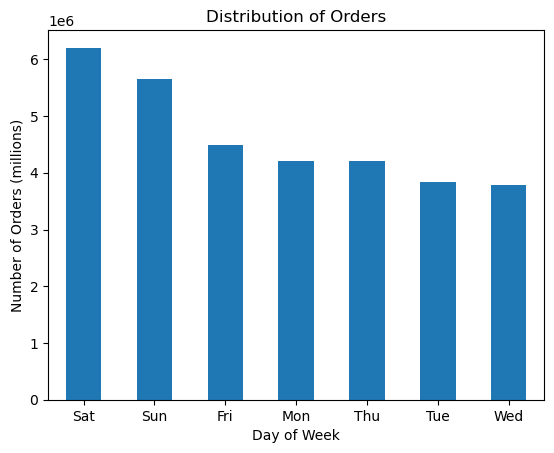

In [7]:
# Create bar chart with days of week sorted
bar = ords_prods_all['orders_day_of_week'].value_counts().sort_values(ascending=False).rename(days_map).plot.bar(title = 'Distribution of Orders', xlabel = 'Day of Week', ylabel = 'Number of Orders (millions)', rot=0)

In [8]:
# Export the bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_day_of_week.png'))

#### Create a histogram of the prices

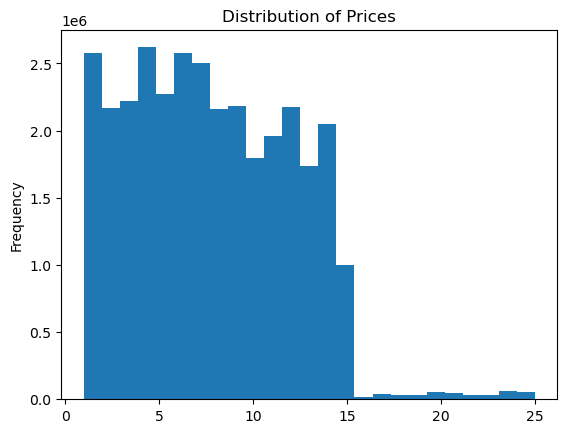

In [9]:
# Create histogram of 'prices' variable
histogram = ords_prods_all['prices'].plot.hist(title = 'Distribution of Prices', bins=25)

In [10]:
# Export the histogram
histogram.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_prices.png'))

#### Split ords_prods_merge dataframe into a 70/30 ratio

In [10]:
# Set the seed for the random() function
np.random.seed(4)

In [11]:
# Create a list holding True/False values to the test np.random.rand() <= 0.7
dev = np.random.rand(len(ords_prods_all)) <= 0.7

In [12]:
# Check the dev list
dev

array([False,  True, False, ...,  True,  True,  True])

In [13]:
# Store 30% of the sample in the dataframe small
small = ords_prods_all[~dev]

In [14]:
# Check the number of rows in small dataframe
len(small)

9721098

#### Using a subset dataframe, create a line chart of the prices over orders_day_of_week

In [15]:
# Create small1 dataframe with the two relevant columns
small1 = small[['orders_day_of_week','prices']]

In [16]:
# Check the output
small1.head()

,orders_day_of_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,1,9.0


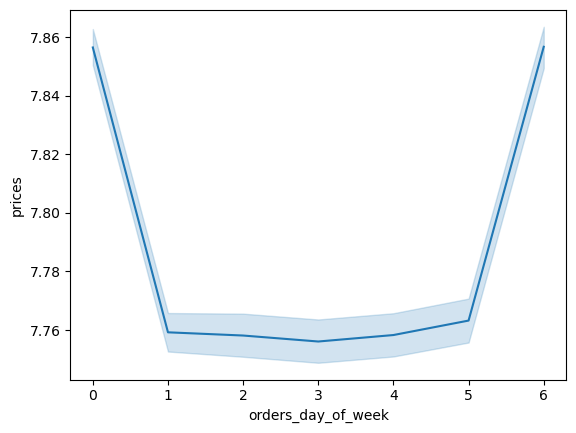

In [18]:
# Create a line chart of the small1 dataframe
line = sns.lineplot(data = small1, x = 'orders_day_of_week', y = 'prices')

In [19]:
# Export the sample line chart
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_day_prices_sample.png'))

#### You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column. Describe what the histogram demonstrates.

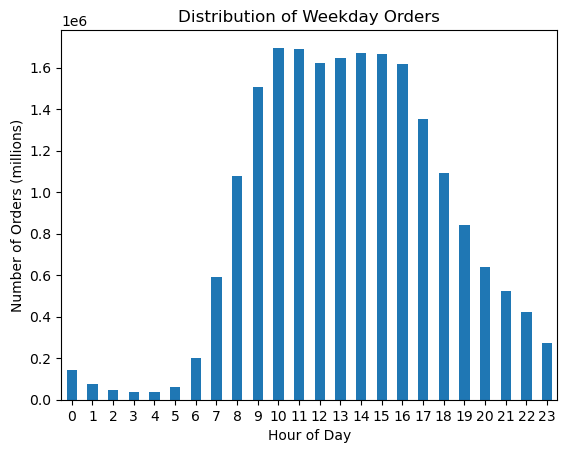

In [11]:
# Create histogram of 'order_hour_of_day' variable for weekday purchases
bar_weekday = ords_prods_all.loc[ords_prods_all['orders_day_of_week'].isin([2, 3, 4, 5, 6])]['order_hour_of_day'].value_counts().sort_index().plot.bar(title = 'Distribution of Weekday Orders', xlabel = 'Hour of Day', ylabel = 'Number of Orders (millions)', rot=0)

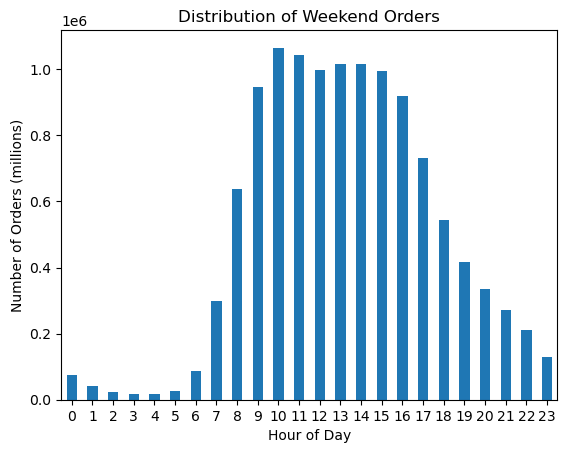

In [12]:
# Create histogram of 'order_hour_of_day' variable for weekday purchases
bar_weekend = ords_prods_all.loc[ords_prods_all['orders_day_of_week'].isin([0, 1])]['order_hour_of_day'].value_counts().sort_index().plot.bar(title = 'Distribution of Weekend Orders', xlabel = 'Hour of Day', ylabel = 'Number of Orders (millions)', rot=0)

The two histogram demonstrates the following:
1. The slowest hours of the day occur from 10pm to 7am.
2. Regularly busy hours of the day occur from 7am to 9am and from 4pm to 10pm.
3. The busiest hours of the day occur from 9am to 4pm.

#### The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_label” column.

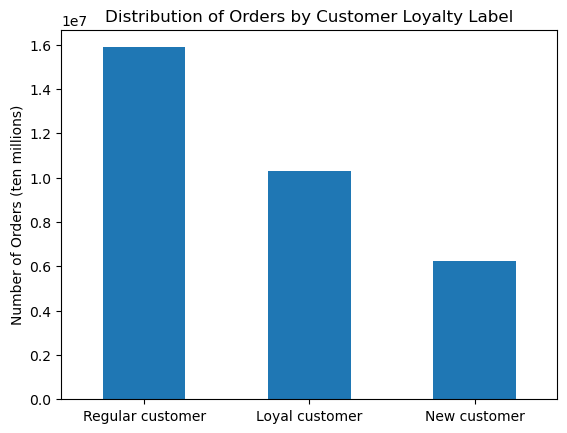

In [13]:
# Create a bar chart of the 'loyalty_label' variable
bar1 = ords_prods_all['loyalty_label'].value_counts().plot.bar(title = 'Distribution of Orders by Customer Loyalty Label', ylabel = 'Number of Orders (ten millions)', rot=0)

#### Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [22]:
# Create small2 dataframe with the two relevant columns
small2 = small[['order_hour_of_day','prices']]

In [23]:
# Check the output
small2.head()

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,9,9.0


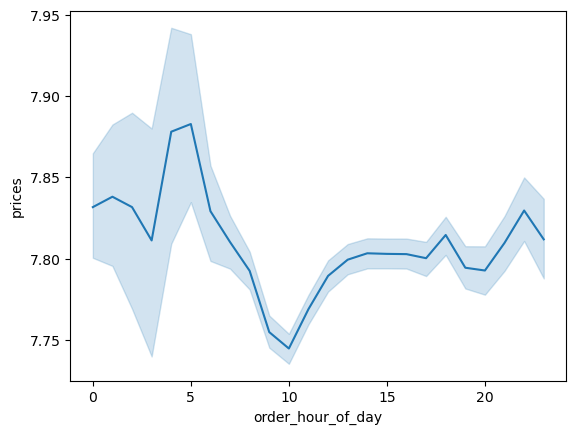

In [24]:
# Create a line chart of the small2 dataframe
line1 = sns.lineplot(data = small2, x = 'order_hour_of_day', y = 'prices')

There is a difference in expenditures depending on the hour of the day, specifically between the hours of 3am and 12pm.

#### Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependants. Describe what the line chart shows.

In [25]:
# Create small3 dataframe with the two relevant columns
small3 = small[['age','number_of_dependants']]

In [26]:
# Check the output
small3.head()

,age,number_of_dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,69,0


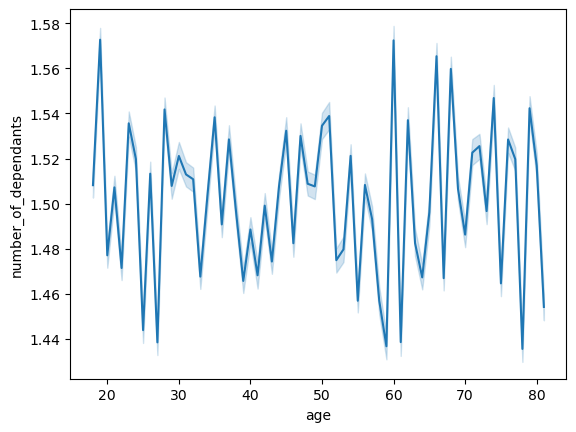

In [27]:
# Create a line chart of the small3 dataframe
line2 = sns.lineplot(data = small3, x = 'age', y = 'number_of_dependants')

Due to the fluctuating nature of the line chart, the line chart reveals that there is no connection between age and the number of dependants of instacart customers.

#### Explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot. Describe what the scatterplot shows.

In [14]:
# Import the “customers.csv” data set using the os library
df_custs = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'customers.csv'))

In [15]:
# Check the output
df_custs.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


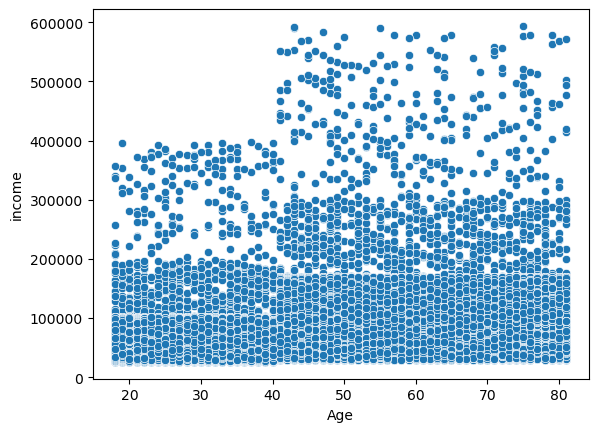

In [16]:
# Create a scatterplot of age vs income
scatter = sns.scatterplot(x = 'Age', y = 'income', data = df_custs)

The scatterplot reveals the following:
1. A majority of instacart customers have an income of 300,000 or fewer.
2. A minority of instacart customers have an income of more than 300,000.

# 3. Export Visualizations

#### Export your visualizations as “.png” files in your relevant project folder.

The visualizations from step 2 have already been exported.

In [17]:
# Export 'weekday_order_hour_of_day' histogram
bar_weekday.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_weekday_order.png'))

In [18]:
# Export 'order_hour_of_day' histogram
bar_weekend.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_weekend_order.png'))

In [27]:
# Export 'loyalty_label' bar chart
bar1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

In [31]:
# Export order_hour_of_day with prices line chart
line1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hour_prices_sample.png'))

In [32]:
# Export age with number_of_dependants line chart
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants_sample.png'))

In [25]:
# Export scatterplot of age vs income
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))